In [7]:
import numpy as np
import pandas as pd
import matplotlib
import os
import math
from sklearn import datasets
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [8]:
os.getcwd()
path = "C:/Users/thehu/OneDrive/Documents/Statics/Breast cancer"
os.chdir(path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/thehu/OneDrive/Documents/Statics/Breast cancer'

In [6]:
# đọc file dữ liệu
data = pd.read_csv("data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [5]:
#mô tả dữ liệu
data.describe()


NameError: name 'data' is not defined

In [4]:
data.info()


NameError: name 'data' is not defined

In [6]:
#bỏ tập dữ liệu 32 vì bị "Unnamed"
data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)

In [7]:
data.shape #xem số dòng và cột của bảng dữ liệu


(569, 31)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

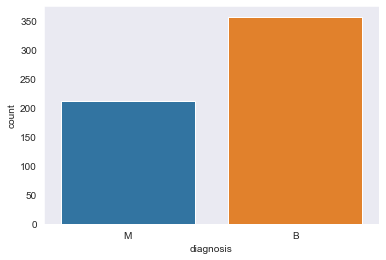

In [8]:
sns.countplot(data['diagnosis'])

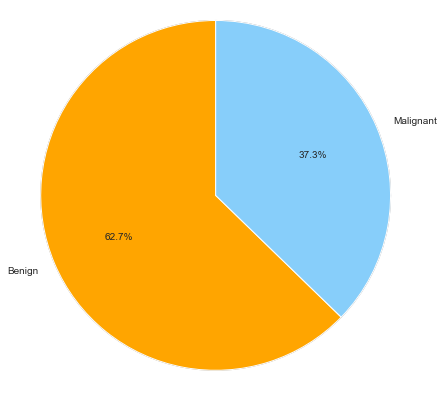

In [9]:
#biểu diễn dưới biểu đồ tròn
# dữ liệu để vẽ
labels = 'Benign', 'Malignant'
sizes = data['diagnosis'].value_counts()
colors = ['orange', 'lightskyblue']
explode= [0.4,0]
# vẽ biểu đồ
plt.pie(sizes, explode=explode, labels=labels,radius= 1400 ,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

radius distribution


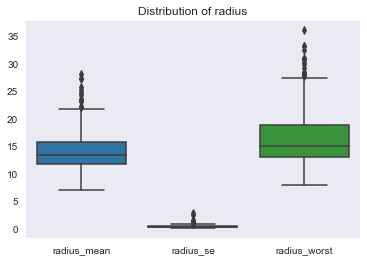

texture distribution


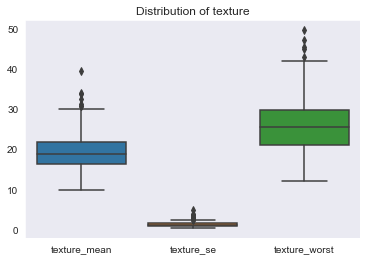

perimeter distribution


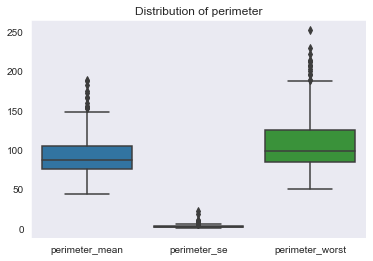

area distribution


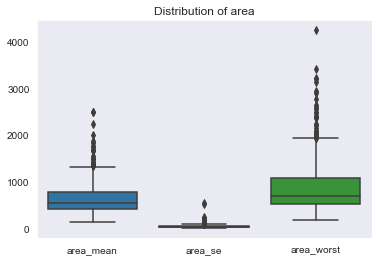

smoothness distribution


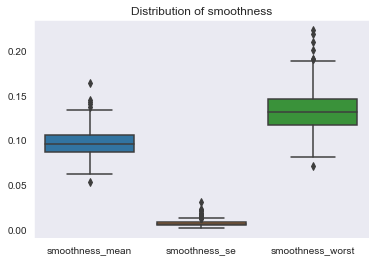

compactness distribution


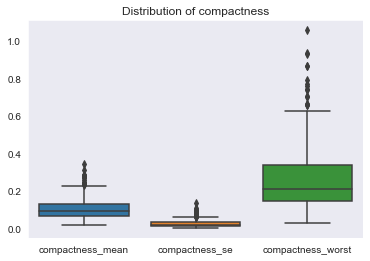

concavity distribution


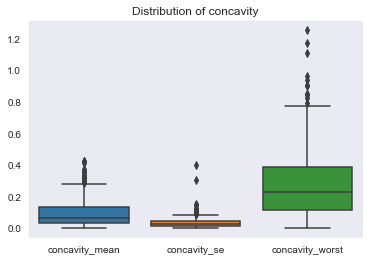

concave points distribution


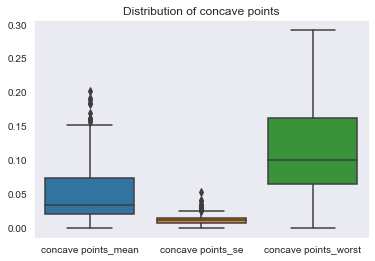

symmetry distribution


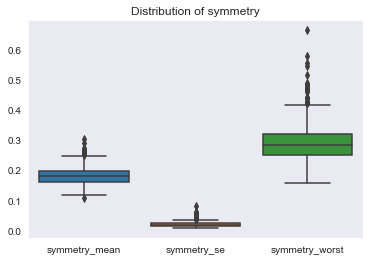

fractal_dimension distribution


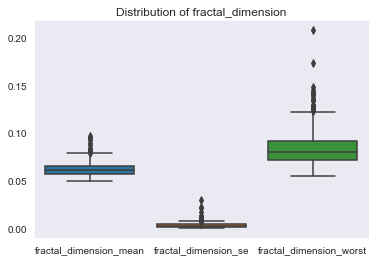

In [28]:
#biểu đồ so sánh từng trường tính năng
#gồm có 10 tính năng với các giá trị safe, worst, mean trong mỗi tính năng
features = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal_dimension']
for feature in features:
    print("{} distribution".format(feature))
    sns.boxplot(data=data[['{}_mean'.format(feature), '{}_se'.format(feature), '{}_worst'.format(feature)]])
    plt.title('Distribution of {}'.format(feature))
    plt.show()

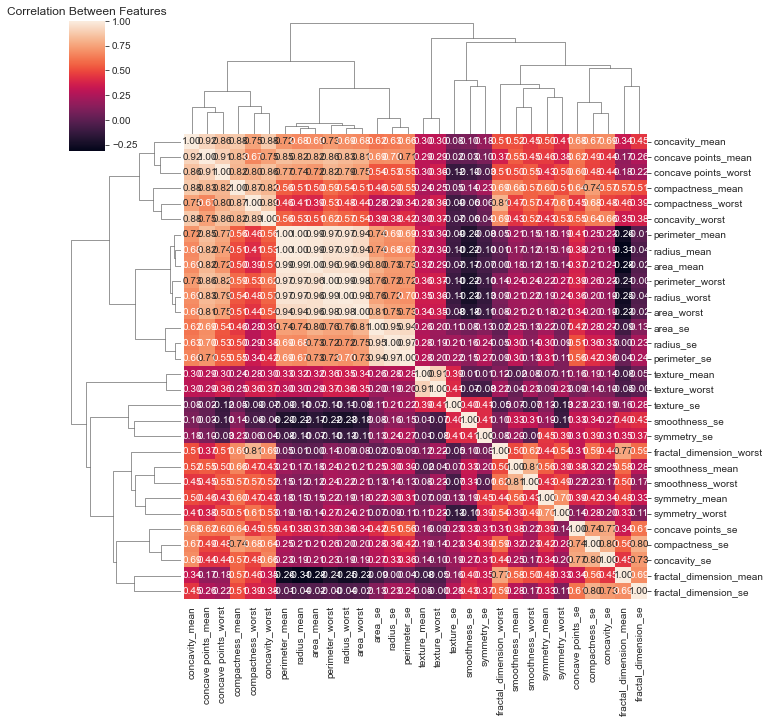

In [19]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

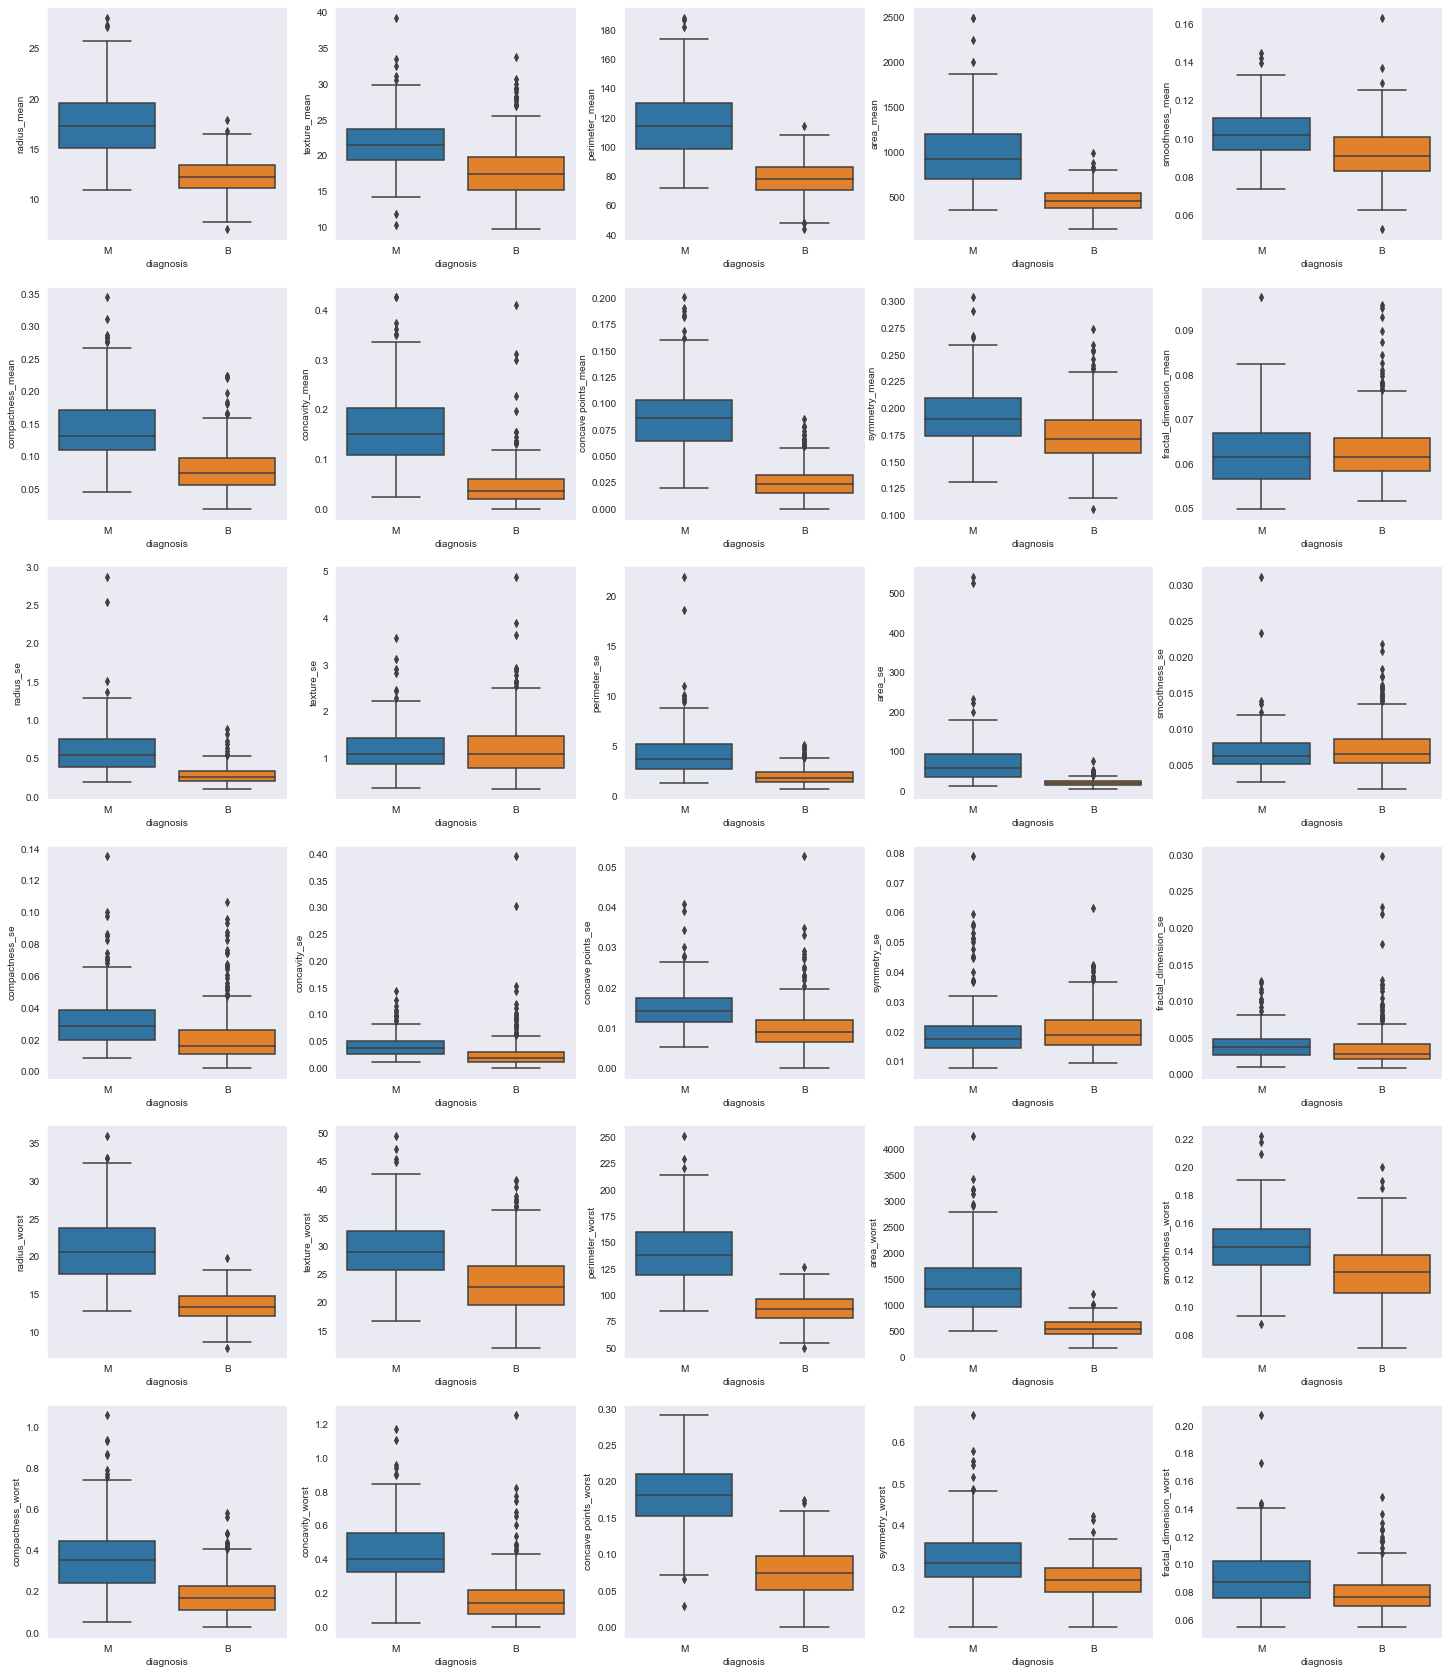

In [37]:
vars = data.keys().drop(['diagnosis'])
plot_cols = 5
plot_rows = math.ceil(len(vars)/plot_cols)

plt.figure(figsize = (5*plot_cols,5*plot_rows))

for idx, var in enumerate(vars):
    plt.subplot(plot_rows, plot_cols, idx+1)
    sns.boxplot(x = 'diagnosis', y = var, data= data)
    

In [1]:
fig, (ax) = plt.subplots(1, 1, figsize=(20,10))

hm = sns.heatmap(data.corr(), 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.suptitle('Biểu đồ nhiệt tương quan', 
              fontsize=14, 
              fontweight='bold');

NameError: name 'plt' is not defined

In [49]:
numerical = data.drop('diagnosis',axis=1).columns
data.groupby(['diagnosis'])[numerical].agg([np.mean, np.std, np.min, np.max])

radius_mean                          texture_mean                   \
                 mean       std    amin   amax         mean       std   amin   
diagnosis                                                                      
B           12.146524  1.780512   6.981  17.85    17.914762  3.995125   9.71   
M           17.462830  3.203971  10.950  28.11    21.604906  3.779470  10.38   

                 perimeter_mean             ... concave points_worst         \
            amax           mean        std  ...                 amin   amax   
diagnosis                                   ...                               
B          33.81      78.075406  11.807438  ...              0.00000  0.175   
M          39.28     115.365377  21.854653  ...              0.02899  0.291   

          symmetry_worst                           fractal_dimension_worst  \
                    mean       std    amin    amax                    mean   
diagnosis                                                                    
B               0.270246  0.041745  0.1566  0.4228                0.079442   
M               0.323468  0.074685  0.1565  0.6638                0.091530   

                                      
                std     amin    amax  
diagnosis                             
B          0.013804  0.05521  0.1486  
M          0.021553  0.05504  0.2075  

[2 rows x 120 columns]